In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_json('cleaned_data_NN.json')

In [3]:
df.head()

,Opinion Unit,Classification
0,Anything less then a 4 Star Review is insane!!!.,2
1,Honestly I'm seeing such low reviews for this ...,0
2,Maybe expectations are a little high lol......,0
3,I received my 3 Echo Dot devices for the Black...,2
4,"Installation was incredibly easy, pairing echo...",1


In [4]:
df.tail()

,Opinion Unit,Classification
3008,"Seeing as it's connected to the internet, it's...",4
3009,Sometimes it'll also offer to open wikihow for...,4
3010,I knew when I purchased it that the technology...,0
3011,but it is impressive how much it's able to do.,0
3012,I just wish it could do some of the more basic...,4


In [5]:
df.Classification.value_counts()

0    1439
4     504
2     474
1     212
6     174
5     116
3      94
Name: Classification, dtype: int64

In [6]:
df.dtypes

Opinion Unit      object
Classification     int64
dtype: object

In [7]:
target = df['Classification']
data = df['Opinion Unit']

In [8]:
target.head()

0    2
1    0
2    0
3    2
4    1
Name: Classification, dtype: int64

In [9]:
data.head()

0     Anything less then a 4 Star Review is insane!!!.
1    Honestly I'm seeing such low reviews for this ...
2       Maybe expectations are a little high lol......
3    I received my 3 Echo Dot devices for the Black...
4    Installation was incredibly easy, pairing echo...
Name: Opinion Unit, dtype: object

In [10]:
train_target = target.to_numpy()
train_target

array([2, 0, 0, ..., 0, 0, 4], dtype=int64)

In [11]:
train_data = data.to_numpy()
train_data

array(['Anything less then a 4 Star Review is insane!!!.',
       "Honestly I'm seeing such low reviews for this product and it drives me crazy lol...Alexa isn't going to make a sandwich for you or put your kids to bed!",
       'Maybe expectations are a little high lol......', ...,
       'I knew when I purchased it that the technology was not yet perfected, ',
       "but it is impressive how much it's able to do.",
       'I just wish it could do some of the more basic things like a Google search, or that it could stay connected to my Philips hue lights.'],
      dtype=object)

In [12]:
train_target = tf.convert_to_tensor(train_target, dtype=tf.int64)
train_target

<tf.Tensor: shape=(3013,), dtype=int64, numpy=array([2, 0, 0, ..., 0, 0, 4], dtype=int64)>

In [13]:
train_data = tf.convert_to_tensor(data, dtype=tf.string)
train_data

<tf.Tensor: shape=(3013,), dtype=string, numpy=
array([b'Anything less then a 4 Star Review is insane!!!.',
       b"Honestly I'm seeing such low reviews for this product and it drives me crazy lol...Alexa isn't going to make a sandwich for you or put your kids to bed!",
       b'Maybe expectations are a little high lol......', ...,
       b'I knew when I purchased it that the technology was not yet perfected, ',
       b"but it is impressive how much it's able to do.",
       b'I just wish it could do some of the more basic things like a Google search, or that it could stay connected to my Philips hue lights.'],
      dtype=object)>

In [14]:
import tensorflow_hub as hub

In [15]:
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1"
hub_layer = hub.KerasLayer(
    embedding, 
    input_shape=[],
    dtype=tf.string,
    trainable=True 
)

In [16]:
hub_layer(train_data[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[-0.04515586,  0.38439378, -0.00862348,  0.12735142,  0.15421997,
        -0.16278568,  0.0346549 ,  0.20164023, -0.1799478 ,  0.29635677,
         0.17961787, -0.03113993,  0.08383163,  0.19392848, -0.00176068,
        -0.23804933, -0.03501107,  0.05157292,  0.08881898, -0.16509867,
        -0.01012601, -0.12274626,  0.18400204,  0.26647696, -0.07218963,
        -0.22103894, -0.16275442, -0.09184449, -0.0617205 ,  0.01252801,
        -0.05160919, -0.01515571, -0.16692635, -0.20542464,  0.2657618 ,
         0.20821892,  0.07090071, -0.08947464,  0.16837114, -0.14600727,
         0.07680877, -0.02254534,  0.05401072, -0.01240704, -0.28338286,
        -0.20138983, -0.3023783 , -0.10187324, -0.21799791,  0.08824417],
       [ 0.24726418, -0.10226426, -0.18725303,  0.21941748,  0.12650426,
         0.11864244,  0.18761171, -0.01025979, -0.38465473,  0.35820276,
         0.10985402,  0.18630286, -0.20056486, -0.0499297 , -0.06096681,
 

In [17]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(units=16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    x=train_data,
    y=train_target,
    epochs=1,
    verbose=1
)

95/95 [==============================] - 94s 994ms/step - loss: 0.0000e+00 - accuracy: 0.3581


In [21]:
import matplotlib.pyplot as plt

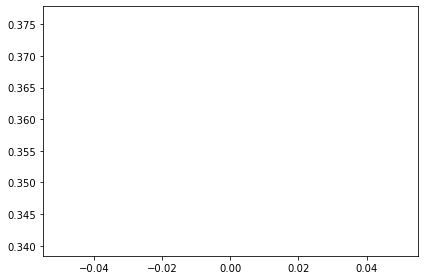

In [22]:
plt.plot(history.history['accuracy'])

plt.tight_layout()
plt.show()

In [23]:
model.save('my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model\assets
INFO:tensorflow:Assets written to: my_model\assets
